In [29]:
import os
import requests as rq
import pandas as pd
# Set max_columns option to None to display all columns
pd.set_option('display.max_columns', None)
import numpy as np
import re
import time
import matplotlib.pyplot as plt

In [30]:
source_dir = 'nfl-big-data-bowl-2023'
file_names = os.listdir(source_dir)
data_frames = {}
names = []
for file_name in file_names:
    name = os.path.splitext(file_name)[0]  # Extract the name without extension
    if name.startswith('week'):
        names.append(name)
        file_path = os.path.join(source_dir, file_name)
        data_frames[name] = pd.read_csv(file_path)
        _,week = name.split('k')
        # print(week)
        data_frames[name].insert(0, 'Week', week, True)
        
    else:    
        file_path = os.path.join(source_dir, file_name)
        data_frames[name] = pd.read_csv(file_path)
print(file_names)
# print(names)
# names is just the weeks
# data_frames['week6'].head()
# Weeks data is plays at 10 fps - use to model how they move over time
data_frames['players'].head()


['week1.csv', 'week2.csv', 'week3.csv', 'pffScoutingData.csv', 'plays.csv', 'week7.csv', 'week6.csv', 'week4.csv', 'week5.csv', 'players.csv', 'games.csv', 'week8.csv']


,nflId,height,weight,birthDate,collegeName,officialPosition,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,28963,6-5,240,1982-03-02,"Miami, O.",QB,Ben Roethlisberger
2,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
3,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
4,30078,6-2,228,1982-11-24,Harvard,QB,Ryan Fitzpatrick


In [31]:
# Getting just names and ID numbers

df_names = data_frames['players'][['nflId','displayName','officialPosition']]
# Store the merged DataFrame in a dictionary
data_frames['names'] = df_names

df_pff_names = pd.merge(data_frames['names'], data_frames['pffScoutingData'], on='nflId', how='inner')

# Store the merged DataFrame in a dictionary
data_frames['pff'] = df_pff_names

# Access the head of the 'players' DataFrame in the dictionary
data_frames['pff'].to_csv('pff.csv')
data_frames['pff'].head(1)
# data_frames['pff'].head()


,nflId,displayName,officialPosition,gameId,playId,pff_role,pff_positionLinedUp,pff_hit,pff_hurry,pff_sack,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,pff_nflIdBlockedPlayer,pff_blockType,pff_backFieldBlock
0,25511,Tom Brady,QB,2021090900,97,Pass,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df_weeks_concat = pd.concat([data_frames[name] for name in names], ignore_index=True, axis=0)
# names is just weeks so
# size = 0
# just checking lengths are correct.
# for name in names:
#     length,_ = data_frames[name].shape
#     size += length
# print(size)
data_frames['all_weeks'] = df_weeks_concat
data_frames['all_weeks'].head()
print(data_frames['all_weeks'].shape)
df_weeks = pd.merge(data_frames['all_weeks'], data_frames['pff'], on=['playId','gameId','nflId'], how='inner')
data_frames['weeks_and_pff'] = df_weeks


print(data_frames['weeks_and_pff'].shape)
data_frames['weeks_and_pff'].head()
# missing around 400k rows, cos inner join ://
# 8314178 before vs 7952692 after
# all weeks is a merge of 


(8314178, 17)
(7952692, 31)


,Week,gameId,playId,nflId,frameId,time,jerseyNumber,team,playDirection,x,y,s,a,dis,o,dir,event,displayName,officialPosition,pff_role,pff_positionLinedUp,pff_hit,pff_hurry,pff_sack,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,pff_nflIdBlockedPlayer,pff_blockType,pff_backFieldBlock
0,1,2021090900,97,25511.0,1,2021-09-10T00:26:31.100,12.0,TB,right,37.77,24.22,0.29,0.30,0.03,165.16,84.99,NaN,Tom Brady,QB,Pass,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2021090900,97,25511.0,2,2021-09-10T00:26:31.200,12.0,TB,right,37.78,24.22,0.23,0.11,0.02,164.33,92.87,NaN,Tom Brady,QB,Pass,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2021090900,97,25511.0,3,2021-09-10T00:26:31.300,12.0,TB,right,37.78,24.24,0.16,0.10,0.01,160.24,68.55,NaN,Tom Brady,QB,Pass,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2021090900,97,25511.0,4,2021-09-10T00:26:31.400,12.0,TB,right,37.73,24.25,0.15,0.24,0.06,152.13,296.85,NaN,Tom Brady,QB,Pass,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2021090900,97,25511.0,5,2021-09-10T00:26:31.500,12.0,TB,right,37.69,24.26,0.25,0.18,0.04,148.33,287.55,NaN,Tom Brady,QB,Pass,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
data_frames.keys()

dict_keys(['week1', 'week2', 'week3', 'pffScoutingData', 'plays', 'week7', 'week6', 'week4', 'week5', 'players', 'games', 'week8', 'names', 'pff', 'all_weeks', 'weeks_and_pff'])

In [35]:
# data_frames['all_weeks'] = df_weeks_concat is just the 8 weeks of data. nothing else
data_frames['all_weeks'].columns

data_frames['plays'].columns
df_play_data = pd.merge(data_frames['all_weeks'], data_frames['plays'], on=['gameId','playId'], how='inner')
data_frames['play_data'] = df_play_data
print(data_frames['play_data'].shape)


data_frames['play_data'].head()



(8314178, 47)


,Week,gameId,playId,nflId,frameId,time,jerseyNumber,team,playDirection,x,y,s,a,dis,o,dir,event,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,penaltyYards,prePenaltyPlayResult,playResult,foulName1,foulNFLId1,foulName2,foulNFLId2,foulName3,foulNFLId3,absoluteYardlineNumber,offenseFormation,personnelO,defendersInBox,personnelD,dropBackType,pff_playAction,pff_passCoverage,pff_passCoverageType
0,1,2021090900,97,25511.0,1,2021-09-10T00:26:31.100,12.0,TB,right,37.77,24.22,0.29,0.30,0.03,165.16,84.99,NaN,(13:33) (Shotgun) T.Brady pass incomplete deep...,1,3,2,TB,DAL,TB,33,13:33,0,0,I,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,43.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man
1,1,2021090900,97,25511.0,2,2021-09-10T00:26:31.200,12.0,TB,right,37.78,24.22,0.23,0.11,0.02,164.33,92.87,NaN,(13:33) (Shotgun) T.Brady pass incomplete deep...,1,3,2,TB,DAL,TB,33,13:33,0,0,I,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,43.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man
2,1,2021090900,97,25511.0,3,2021-09-10T00:26:31.300,12.0,TB,right,37.78,24.24,0.16,0.10,0.01,160.24,68.55,NaN,(13:33) (Shotgun) T.Brady pass incomplete deep...,1,3,2,TB,DAL,TB,33,13:33,0,0,I,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,43.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man
3,1,2021090900,97,25511.0,4,2021-09-10T00:26:31.400,12.0,TB,right,37.73,24.25,0.15,0.24,0.06,152.13,296.85,NaN,(13:33) (Shotgun) T.Brady pass incomplete deep...,1,3,2,TB,DAL,TB,33,13:33,0,0,I,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,43.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man
4,1,2021090900,97,25511.0,5,2021-09-10T00:26:31.500,12.0,TB,right,37.69,24.26,0.25,0.18,0.04,148.33,287.55,NaN,(13:33) (Shotgun) T.Brady pass incomplete deep...,1,3,2,TB,DAL,TB,33,13:33,0,0,I,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,43.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man


gameId                     0.000000
season                     0.000000
week                       0.000000
gameDate                   0.000000
gameTimeEastern            0.000000
homeTeamAbbr               0.000000
visitorTeamAbbr            0.000000
playId                     0.000000
playDescription            0.000000
quarter                    0.000000
down                       0.000000
yardsToGo                  0.000000
possessionTeam             0.000000
defensiveTeam              0.000000
yardlineSide               1.460792
yardlineNumber             0.000000
gameClock                  0.000000
preSnapHomeScore           0.000000
preSnapVisitorScore        0.000000
passResult                 0.000000
penaltyYards              91.165128
prePenaltyPlayResult       0.000000
playResult                 0.000000
foulName1                 91.398855
foulNFLId1                91.398855
foulName2                 99.649410
foulNFLId2                99.649410
foulName3                 99

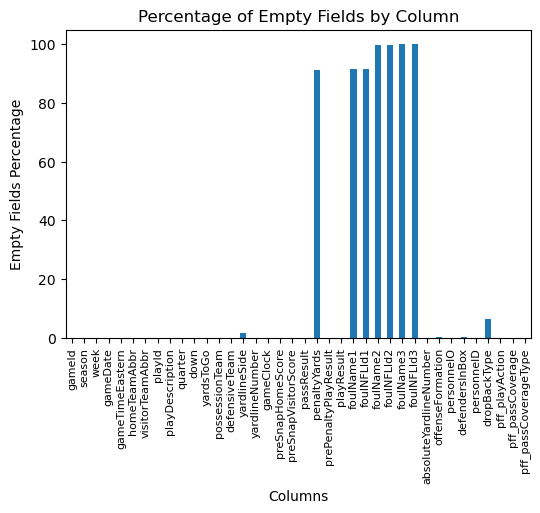

0       I
1       C
2       C
3       I
4       I
       ..
8552    S
8553    C
8554    S
8555    I
8556    S
Name: passResult, Length: 8557, dtype: object
(8557, 44)


,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,penaltyYards,prePenaltyPlayResult,playResult,foulName1,foulNFLId1,foulName2,foulNFLId2,foulName3,foulNFLId3,absoluteYardlineNumber,offenseFormation,personnelO,defendersInBox,personnelD,dropBackType,pff_playAction,pff_passCoverage,pff_passCoverageType,DL,LB,DB,Clean_Play,passer,receiver
8457,2021103112,2021,8,10/31/2021,20:20:00,MIN,DAL,3193,(12:19) (Shotgun) C.Rush pass incomplete short...,4,1,10,DAL,MIN,DAL,37,12:19,13,13,I,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,47.0,SHOTGUN,"1 RB, 2 TE, 2 WR",7.0,"4 DL, 3 LB, 4 DB",TRADITIONAL,1,Cover-6,Zone,4,3,4,C.Rush pass incomplete short left to E.Elliott.,C.Rush,E.Elliott
8458,2021103112,2021,8,10/31/2021,20:20:00,MIN,DAL,3221,(12:13) (Shotgun) C.Rush pass short left to N....,4,2,10,DAL,MIN,DAL,37,12:13,13,13,C,-10.0,24,-10,Offensive Holding,36785.0,NaN,NaN,NaN,NaN,47.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",NaN,0,Cover-3,Zone,4,2,5,C.Rush pass short left to N.Brown to MIN 39 ...,C.Rush,N.Brown
8459,2021103112,2021,8,10/31/2021,20:20:00,MIN,DAL,3280,(11:22) (Shotgun) C.Rush pass short right to C...,4,3,13,DAL,MIN,DAL,34,11:22,13,13,C,NaN,19,19,NaN,NaN,NaN,NaN,NaN,NaN,44.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-2,Zone,4,2,5,C.Rush pass short right to C.Lamb to MIN 47 ...,C.Rush,C.Lamb
8460,2021103112,2021,8,10/31/2021,20:20:00,MIN,DAL,3325,(10:03) (Shotgun) C.Rush sacked at DAL 47 for ...,4,2,8,DAL,MIN,MIN,45,10:03,13,13,S,NaN,-3,-3,NaN,NaN,NaN,NaN,NaN,NaN,65.0,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,1,Quarters,Zone,4,2,5,C.Rush sacked at DAL 47 for -8 yards . FUMBL...,C.Rush,NaN
8461,2021103112,2021,8,10/31/2021,20:20:00,MIN,DAL,3363,(9:56) K.Cousins pass incomplete short right [...,4,1,10,MIN,DAL,MIN,48,09:56,13,13,I,-13.0,0,-13,Intentional Grounding,38632.0,Offensive Holding,47976.0,NaN,NaN,62.0,SINGLEBACK,"2 RB, 1 TE, 2 WR",7.0,"4 DL, 2 LB, 5 DB",DESIGNED_ROLLOUT_RIGHT,1,Cover-1,Man,4,2,5,K.Cousins pass incomplete short right . PENAL...,K.Cousins,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8552,2021110100,2021,8,11/01/2021,20:15:00,KC,NYG,4310,(1:56) (Shotgun) P.Mahomes sacked at NYG 16 fo...,4,3,8,KC,NYG,NYG,8,01:56,17,17,S,NaN,-8,-8,NaN,NaN,NaN,NaN,NaN,NaN,18.0,SHOTGUN,"1 RB, 1 TE, 3 WR",4.0,"1 DL, 3 LB, 7 DB",SCRAMBLE,0,Bracket,Other,1,3,7,P.Mahomes sacked at NYG 16 for -8 yards .,P.Mahomes,NaN
8553,2021110100,2021,8,11/01/2021,20:15:00,KC,NYG,4363,(1:07) (Shotgun) D.Jones pass short right to E...,4,1,10,NYG,KC,NYG,25,01:07,20,17,C,NaN,3,3,NaN,NaN,NaN,NaN,NaN,NaN,35.0,SHOTGUN,"1 RB, 1 TE, 3 WR",5.0,"4 DL, 1 LB, 6 DB",SCRAMBLE,0,Cover-2,Zone,4,1,6,D.Jones pass short right to E.Engram pushed ...,D.Jones,E.Engram
8554,2021110100,2021,8,11/01/2021,20:15:00,KC,NYG,4392,"(1:01) (No Huddle, Shotgun) D.Jones sacked at ...",4,2,7,NYG,KC,NYG,28,01:01,20,17,S,NaN,-8,-8,NaN,NaN,NaN,NaN,NaN,NaN,38.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 1 LB, 6 DB",TRADITIONAL,0,Cover-2,Zone,4,1,6,D.Jones sacked at NYG 20 for -8 yards .,D.Jones,NaN
8555,2021110100,2021,8,11/01/2021,20:15:00,KC,NYG,4411,"(:39) (No Huddle, Shotgun) D.Jones pass incomp...",4,3,15,NYG,KC,NYG,20,00:39,20,17,I,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,30.0,SHOTGUN,"1 RB, 1 TE, 3 WR",5.0,"4 DL, 1 LB, 6 DB",TRADITIONAL,0,Cover-2,Zone,4,1,6,D.Jones pass incomplete short right to E.Eng...,D.Jones,E.Engram


In [37]:
# ['week1', 'week2', 'week3', 'pffScoutingData', 'plays', 'week7', 'week6', 'week4', 'week5', 'players', 'games', 'week8', 'names', 'pff', 'all_weeks', 'weeks_and_pff']
# game, play

df_team = pd.merge(data_frames['games'],data_frames['plays'],on=['gameId',],how='left') 
data_frames['team_data'] = df_team


df = data_frames['team_data']

# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100

average_missing = missing_percentage.mean()
# Print the percentage of missing values for each column
print(missing_percentage)
print(average_missing)
plt.figure(figsize=(6, 4))  # Adjust the size of the figure as needed
missing_percentage.plot.bar()
plt.title('Percentage of Empty Fields by Column')
plt.xlabel('Columns')
plt.ylabel('Empty Fields Percentage')
plt.xticks(fontsize=8, rotation=90)
# plt.grid(True)
plt.show()

data_frames['team_data']['DL'] = data_frames['team_data']['personnelD'].str.extract('(\d+) DL').fillna(0).astype(int)
data_frames['team_data']['LB'] = data_frames['team_data']['personnelD'].str.extract('(\d+) LB').fillna(0).astype(int)
data_frames['team_data']['DB'] = data_frames['team_data']['personnelD'].str.extract('(\d+) DB').fillna(0).astype(int)
data_frames['team_data']['Clean_Play'] = data_frames['team_data']['playDescription'].str.replace(r'\([^)]*\)', '', regex=True).str.replace(r'\[[^\]]*\]', '', regex=True)

# Extract passer - checking for "pass" or "sacked"
data_frames['team_data']['passer'] = data_frames['team_data']['Clean_Play'].str.extract(r'(\w+\.\w+) (?:pass|sacked)')

# Attempt to extract receiver only when "to" is present before extracting names that follow "RECOVERED by" for other context
data_frames['team_data']['receiver'] = data_frames['team_data']['Clean_Play'].str.extract(r'to (\w+\.\w+)')

print(df_team['passResult'])
print(df_team.shape)
# df_team = df_team.sort_values(['week','gameId','playId'],ascending=False)
df_team.tail(100)



In [46]:
teams = data_frames['team_data']['defensiveTeam'].tolist()

teams = np.unique(teams)

team_means = []
# teams = ['ARI']
for team in teams:
    
# Step 1: Filter the DataFrame based on the value in column
    df_team_filter = data_frames['team_data'][data_frames['team_data']['defensiveTeam'] == team]  # For example, we're interested when column1 has value 1

# Step 2 & 3: Group by column2 and count occurrences
    personnel_counts = df_team_filter['personnelD'].value_counts()
    box_counts = df_team_filter['defendersInBox'].value_counts()
    PC_counts = df_team_filter['pff_passCoverage'].value_counts()
    PCT_counts = df_team_filter['pff_passCoverageType'].value_counts()
    passer_counts = df_team_filter['passer'].value_counts()
    receiver_counts = df_team_filter['receiver'].value_counts()
    # Average number of each type of player on the field = average formation
    DL_mean = df_team_filter['DL'].mean()
    LB_mean = df_team_filter['LB'].mean()
    DB_mean = df_team_filter['DB'].mean()

    team_means.append({
        'Team': team,
        'DL_Mean': DL_mean,
        'LB_Mean': LB_mean,
        'DB_Mean': DB_mean,

    })
    

    pen_yards = df_team_filter['playResult'].sum()

    print(f'Over the 8 weeks of games in the data, the {team} defended against {personnel_counts.sum()} passing plays')
    print(f'In that time, they gave up {pen_yards} yards to the offensive teams.')
        

# Step 4: Calculate percentage
    print(team)
    personnel_p = personnel_counts / personnel_counts.sum() * 100
    box_p = box_counts / box_counts.sum() * 100
    PC_p = PC_counts / PC_counts.sum() * 100
    PCT_p = PCT_counts / PCT_counts.sum() * 100
    print(personnel_p, '\n')
    print(box_p, '\n')
    print(PC_p, '\n')
    print(PCT_p, '\n')
    print(receiver_counts)
    print(f'On Average, {team} have {DL_mean} defensive linemen on the field in a play.')
    print(f'On Average, {team} have {LB_mean} linebackers on the field in a play.')
    print(f'On Average, {team} have {DB_mean} defensive backs on the field in a play.')
    


    threshold = 3

    # Filter and create the 'Other' category
    below_threshold = personnel_counts[personnel_counts < threshold].sum()
    above_threshold = personnel_counts[personnel_counts >= threshold]

    # Combine into a new Series
    new_data = pd.concat([above_threshold,pd.Series({'Other': below_threshold})])

    # # Plotting
    # plt.figure(figsize=(6, 4))
    # new_data.plot(kind='bar', color='teal')
    # plt.title(f'Defensive Personnel for {team} Against Passing Plays')
    # plt.xlabel('Formation')
    # plt.ylabel('Count')
    # plt.grid(False)
    # # plt.xticks(rotation=45)
    # plt.show()

# Create DataFrame from list of dictionaries
position_means = pd.DataFrame(team_means)


Over the 8 weeks of games in the data, the ARI defended against 265 passing plays
In that time, they gave up 1445 yards to the offensive teams.
ARI
personnelD
2 DL, 4 LB, 5 DB    63.018868
3 DL, 4 LB, 4 DB    18.113208
1 DL, 5 LB, 5 DB    10.566038
4 DL, 4 LB, 3 DB     4.528302
3 DL, 3 LB, 5 DB     1.509434
4 DL, 6 LB, 1 DB     1.132075
4 DL, 5 LB, 2 DB     0.754717
2 DL, 3 LB, 6 DB     0.377358
Name: count, dtype: float64 

defendersInBox
6.0     41.886792
7.0     25.283019
5.0     22.264151
8.0      4.528302
4.0      4.150943
9.0      1.132075
10.0     0.377358
11.0     0.377358
Name: count, dtype: float64 

pff_passCoverage
Cover-3          34.339623
Cover-1          14.339623
Cover-2          13.584906
Quarters         10.188679
Cover-6           8.679245
Cover-0           7.547170
2-Man             6.415094
Red Zone          2.641509
Goal Line         1.509434
Miscellaneous     0.377358
Prevent           0.377358
Name: count, dtype: float64 

pff_passCoverageType
Zone     66.79245

The team that on average has the most DLs on the field has 4.10, and the least is 1.88.
 The range is 2.23.
 The mean average is 3.08. The standard deviation is 0.81.
The team that on average has the most LBs on the field has 4.14, and the least is 1.81.
 The range is 2.32.
 The mean average is 2.87. The standard deviation is 0.79.
The team that on average has the most DBs on the field has 5.40, and the least is 4.66.
 The range is 0.74.
 The mean average is 5.06. The standard deviation is 0.19.


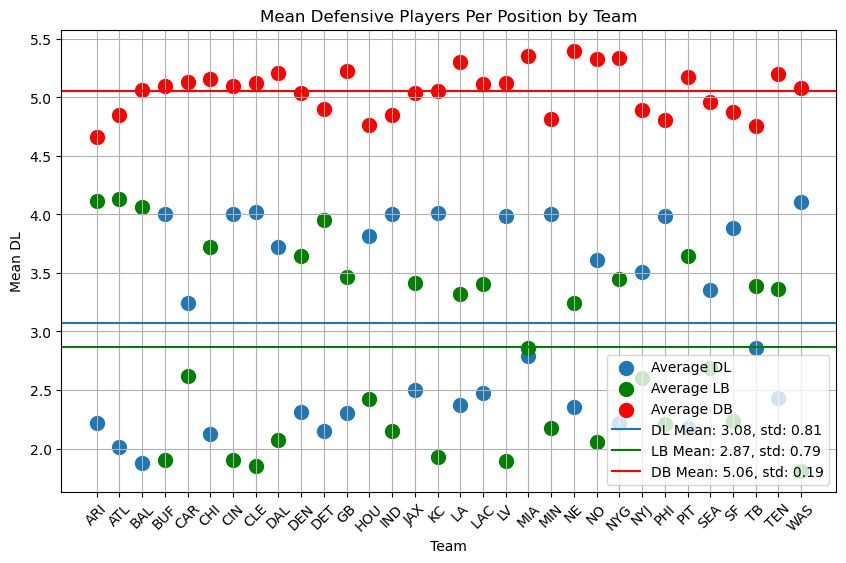

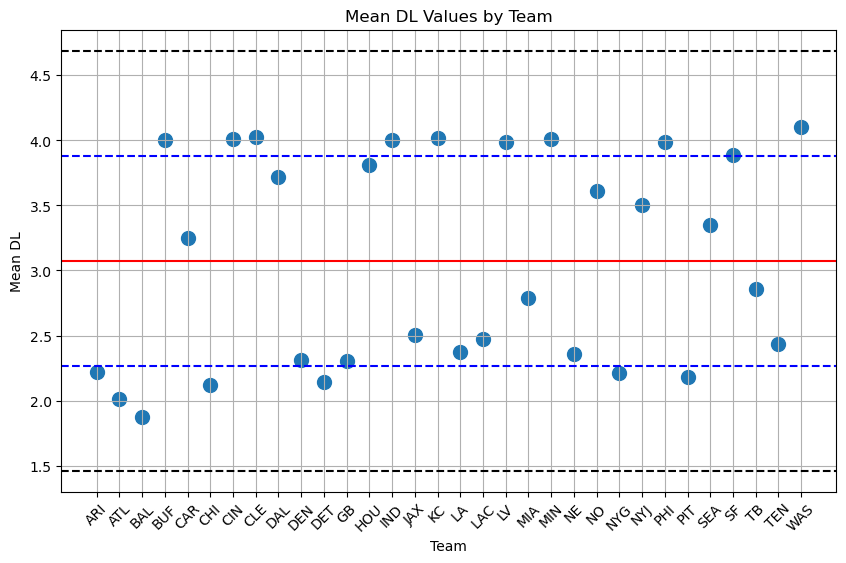

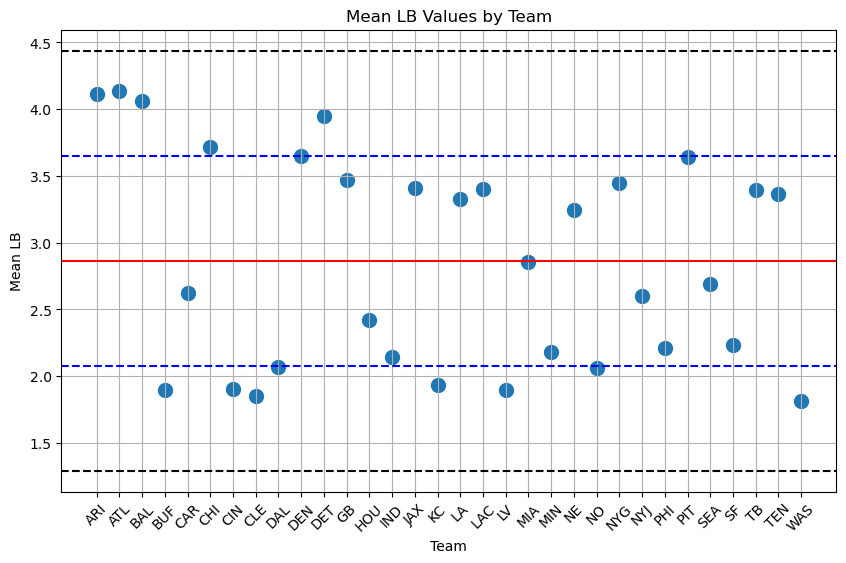

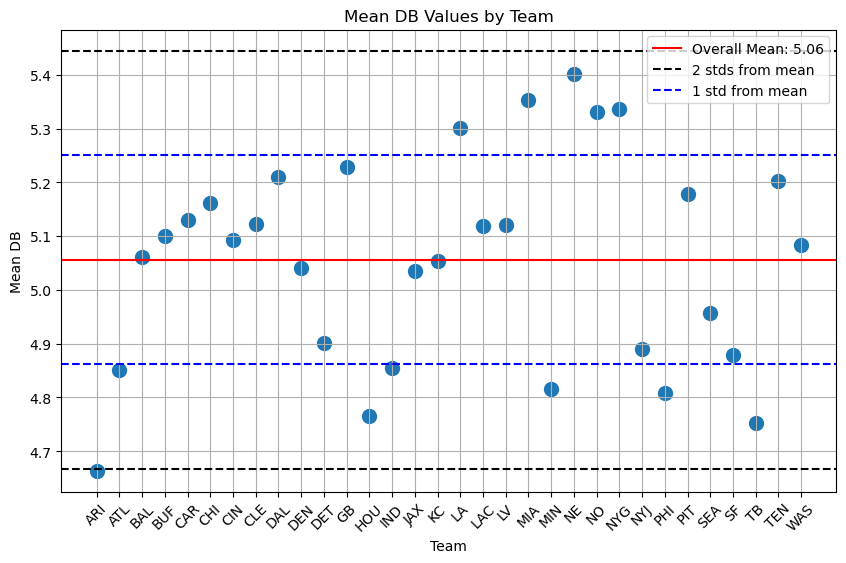

In [51]:
position_means.head()

dl_max = position_means['DL_Mean'].max()
dl_min = position_means['DL_Mean'].min()
dl_range = position_means['DL_Mean'].max() - position_means['DL_Mean'].min()
dl_mean_mean = position_means['DL_Mean'].mean()
dl_std = position_means['DL_Mean'].std()
print(f"The team that on average has the most DLs on the field has {dl_max:.2f}, and the least is {dl_min:.2f}.\n The range is {dl_range:.2f}.\n The mean average is {dl_mean_mean:.2f}. The standard deviation is {dl_std:.2f}.")
lb_max = position_means['LB_Mean'].max()
lb_min = position_means['LB_Mean'].min()
lb_range = position_means['LB_Mean'].max() - position_means['LB_Mean'].min()
lb_mean_mean = position_means['LB_Mean'].mean()
lb_std = position_means['LB_Mean'].std()
print(f"The team that on average has the most LBs on the field has {lb_max:.2f}, and the least is {lb_min:.2f}.\n The range is {lb_range:.2f}.\n The mean average is {lb_mean_mean:.2f}. The standard deviation is {lb_std:.2f}.")
db_max = position_means['DB_Mean'].max()
db_min = position_means['DB_Mean'].min()
db_range = position_means['DB_Mean'].max() - position_means['DB_Mean'].min()
db_mean_mean = position_means['DB_Mean'].mean()
db_std = position_means['DB_Mean'].std()
print(f"The team that on average has the most DBs on the field has {db_max:.2f}, and the least is {db_min:.2f}.\n The range is {db_range:.2f}.\n The mean average is {db_mean_mean:.2f}. The standard deviation is {db_std:.2f}.")




plt.figure(figsize=(10, 6))
plt.scatter(position_means['Team'], position_means['DL_Mean'], s=100, label = 'Average DL') 
plt.scatter(position_means['Team'], position_means['LB_Mean'], s=100, color = 'green', label = 'Average LB')
plt.scatter(position_means['Team'], position_means['DB_Mean'], s=100, color = 'red', label = 'Average DB') 
plt.axhline(y=dl_mean_mean, linestyle='-', label=f'DL Mean: {dl_mean_mean:.2f}, std: {dl_std:.2f}')
plt.axhline(y=lb_mean_mean, color='green', linestyle='-', label=f'LB Mean: {lb_mean_mean:.2f}, std: {lb_std:.2f}')
plt.axhline(y=db_mean_mean, color='red', linestyle='-', label=f'DB Mean: {db_mean_mean:.2f}, std: {db_std:.2f}') 



plt.title('Mean Defensive Players Per Position by Team')
plt.xlabel('Team')
plt.ylabel('Mean DL')
plt.legend()
# plt.legend(['Average DL','Average LB','Average DB'])
plt.xticks(rotation=45)  # Rotate team names for better visibility
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(position_means['Team'], position_means['DL_Mean'], s=100) 
plt.axhline(y=dl_mean_mean, color='r', linestyle='-', label=f'Overall Mean: {dl_mean_mean:.2f}')
plt.axhline(y=(dl_mean_mean+2*dl_std), color='k', linestyle='--')
plt.axhline(y=(dl_mean_mean-2*dl_std), color='k', linestyle='--')
plt.axhline(y=(dl_mean_mean+dl_std), color='b', linestyle='--')
plt.axhline(y=(dl_mean_mean-dl_std), color='b', linestyle='--')
plt.title('Mean DL Values by Team')
plt.xlabel('Team')
plt.ylabel('Mean DL')
plt.xticks(rotation=45)  # Rotate team names for better visibility
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(position_means['Team'], position_means['LB_Mean'], s=100)  # 's' is the size of each point
plt.axhline(y=lb_mean_mean, color='r', linestyle='-', label=f'Overall Mean: {lb_mean_mean:.2f}')
plt.axhline(y=(lb_mean_mean+2*lb_std), color='k', linestyle='--')
plt.axhline(y=(lb_mean_mean-2*lb_std), color='k', linestyle='--')
plt.axhline(y=(lb_mean_mean+lb_std), color='b', linestyle='--')
plt.axhline(y=(lb_mean_mean-lb_std), color='b', linestyle='--')
plt.title('Mean LB Values by Team')
plt.xlabel('Team')
plt.ylabel('Mean LB')
plt.xticks(rotation=45)  # Rotate team names for better visibility
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(position_means['Team'], position_means['DB_Mean'], s=100)  # 's' is the size of each point
plt.axhline(y=db_mean_mean, color='r', linestyle='-', label=f'Overall Mean: {db_mean_mean:.2f}')
plt.axhline(y=(db_mean_mean+2*db_std), color='k', linestyle='--', label='2 stds from mean')
plt.axhline(y=(db_mean_mean-2*db_std), color='k', linestyle='--')  # No label needed here, it uses the same as the above line
plt.axhline(y=(db_mean_mean+db_std), color='b', linestyle='--', label='1 std from mean')
plt.axhline(y=(db_mean_mean-db_std), color='b', linestyle='--')  # No label needed here, it uses the same as the above line
plt.title('Mean DB Values by Team')
plt.xlabel('Team')
plt.ylabel('Mean DB')
plt.legend()
plt.xticks(rotation=45)  # Rotate team names for better visibility
plt.grid(True)
plt.show()






In [ ]:
missing_D = data_frames['team_data']['personnelD'].isnull().mean() * 100
print(missing_D)
missing_O = data_frames['team_data']['personnelO'].isnull().mean() * 100
print(missing_O)



0.01168633867009466
100.0


In [ ]:
all_data = pd.merge(data_frames['all_weeks'], data_frames['plays'], on=['gameId','playId'], how='inner')
all_data = pd.merge(data_frames['games'], all_data, on=['gameId','playId'], how='inner')
all_data = pd.merge(data_frames['pff'], all_data, on=['gameId','playId'], how='inner')